# mnist dataset 손글씨 인식 - Basic Fully Connected Layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.datasets import mnist
np.random.seed(102)

In [2]:
# load mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


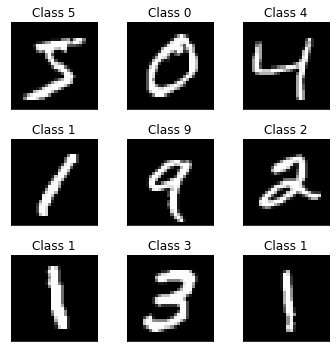

In [3]:
plt.figure(figsize=(5,5))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

plt.show()

## Dense layer 의 input 으로 만들기 위해 28 X 28 을 784 로 flatten

In [4]:
X_train_scaled = X_train / 255.
X_test_scaled = X_test / 255.

X_train_scaled = X_train.reshape(-1, 784).astype("float32")
X_test_scaled  = X_test.reshape(-1, 784).astype("float32")

print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


## Target label 을 one-hot format, i.e.

0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]  
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]  
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]  
etc.

In [5]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

print(y_train_onehot.shape)
print(y_test_onehot.shape)

(60000, 10)
(10000, 10)


## tf.data 를 이용한 shuffling and batch 구성

In [6]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(32)

In [7]:
for train, data in train_ds.take(1):
    print(train.shape, data.shape)

(32, 784) (32, 10)


In [8]:
# 2 : Hidden Layers
model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [11]:
history = model.fit(train_ds, epochs=5, verbose=1, validation_data=test_ds)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3874 - accuracy: 0.7140 - val_loss: 0.5089 - val_accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5791 - accuracy: 0.8475 - val_loss: 0.3162 - val_accuracy: 0.9213
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4135 - accuracy: 0.8902 - val_loss: 0.2565 - val_accuracy: 0.9346
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3571 - accuracy: 0.9011 - val_loss: 0.2450 - val_accuracy: 0.9392
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3262 - accuracy: 0.9094 - val_loss: 0.2246 - val_accuracy: 0.9436


In [12]:
score = model.evaluate(test_ds, verbose=0)

print(model.metrics_names)
print("Test score : {:.2f}".format(score[0]))          # evaluation of loss function
print("Test accuracy :", score[1])

['loss', 'accuracy']
Test score : 0.22
Test accuracy : 0.9435999989509583


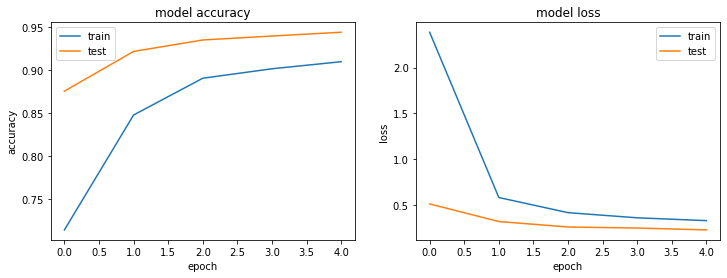

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test']);

In [14]:
# according to the trained classifier for each input example.
y_pred = model.predict(X_test_scaled).argmax(axis=-1)

313/313 [==============================] - 0s 853us/step


In [15]:
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]

In [16]:
print(correct_indices.shape)
print(incorrect_indices.shape)

(9436,)
(564,)


In [17]:
correct_indices[:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 9], dtype=int64)

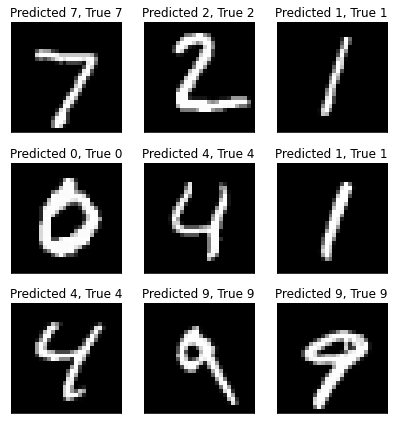

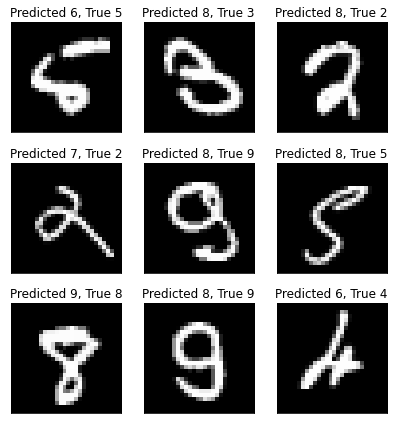

In [18]:
plt.figure(figsize=(6,6))

for i, idx in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title("Predicted {}, True {}".format(y_pred[idx], y_test[idx]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    
plt.figure(figsize=(6,6))
for i, idx in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title("Predicted {}, True {}".format(y_pred[idx], y_test[idx]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

In [19]:
np.argmax(model.predict(X_test[5].reshape((1,784))))

1/1 [==============================] - 0s 43ms/step


1

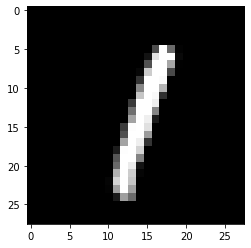

In [20]:
plt.imshow(X_test[5], cmap='gray')

# 실습 : fashion MNIST 를 이용하여 위와 동일한 작업

- Fashion MNIST 는 10 개 카테고리에 70,000 개의 회색조 이미지가 포함 된 [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터 세트.  

- 이미지는 다음과 같이 저해상도 (28 x 28 픽셀)의 개별 의류 품목을 보여준다.  

- 여기서 60,000 개의 이미지를 사용하여 네트워크를 훈련시키고 10,000 개의 이미지를 사용하여 네트워크가 이미지를 분류하는 방법을 얼마나 정확하게 학습했는지 평가   

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
</table>

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [21]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

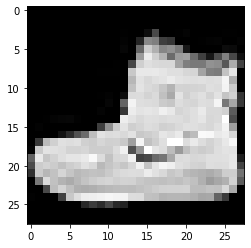

In [23]:
plt.imshow(train_images[0], cmap='gray')

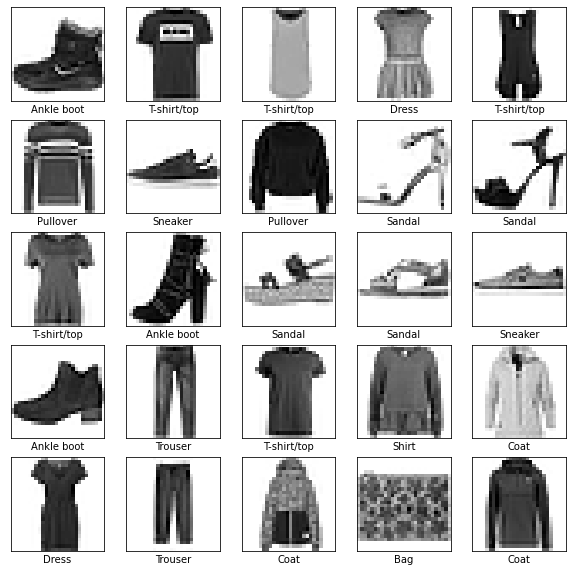

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

In [25]:
train_images = train_images / 255.0
test_images = test_images / 255.0